In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

np.set_printoptions(precision=2)

## Support Vector Machine

### Linear Support vector Machine

<IPython.core.display.Javascript object>


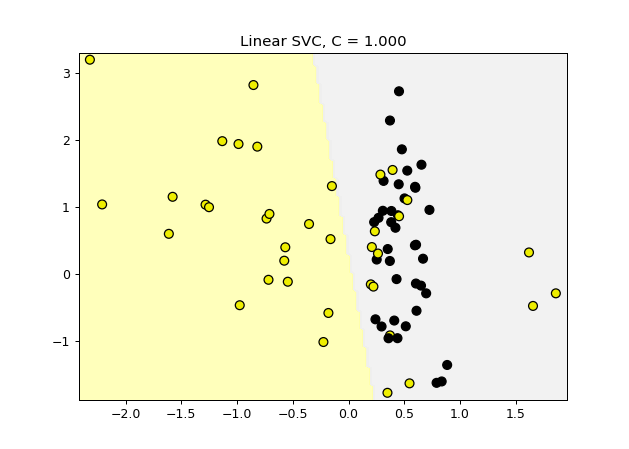

In [4]:
from sklearn.svm import SVC
from plotting_utils import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

### Linear Supprot Vector Machine: C parameter
c = 0.00001 and c = 100 两种情况

<IPython.core.display.Javascript object>


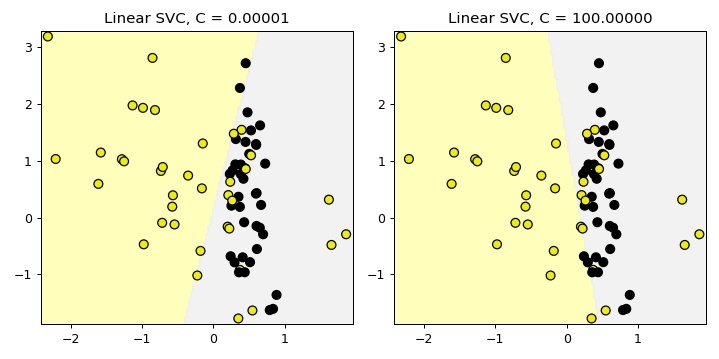

In [12]:
from sklearn.svm import LinearSVC
from plotting_utils import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C,max_iter=50000).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

## Application to real dataset

In [26]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_breast_cancer

(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC(max_iter=90000).fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC on training set - Known data: {:.3f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC on test set - Unknown data: {:.3f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC on training set - Known data: 0.930
Accuracy of Linear SVC on test set - Unknown data: 0.895


H:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Multi-class classification with linear models

### LinearSVC with M classes generates M one vs rest classifiers.

In [35]:
from sklearn.svm import LinearSVC

fruits = pd.read_csv('fruit_data_with_colors.csv',sep='\t')

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67,max_iter=50000).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[-0.28  0.64]
 [-1.64  1.16]
 [-0.01  0.33]
 [ 1.24 -1.73]]
Intercepts:
 [-2.71  1.21 -2.75  1.68]
